In [1]:
import numpy as np 
import pandas as pd 
import os

In [2]:
import matplotlib.pyplot as plt
import librosa
import IPython.display as ipd
import librosa.display
from pathlib import Path
from glob import glob
import random

In [3]:
base_dir='/kaggle/input/indian-languages-audio-dataset/Indian_Languages_Audio_Dataset/'
languages = os.listdir(base_dir)


for i in languages:
    print(i)

Punjabi
Tamil
Hindi
Bengali
Telugu
Kannada
Gujarati
Urdu
Marathi
Malayalam


In [4]:
for path in Path(base_dir).iterdir():
    if path.is_dir():
      print(f"{path.name}: {len(list(path.glob('*')))}")

Punjabi: 1000
Tamil: 1000
Hindi: 1000
Bengali: 1000
Telugu: 1000
Kannada: 1000
Gujarati: 1000
Urdu: 1000
Marathi: 1000
Malayalam: 1000


In [118]:
for language in languages:
    language_dir = os.path.join(base_dir, language)
    audio_files = glob(os.path.join(language_dir, '*.mp3'))
    random_audio_file = random.choice(audio_files)
    print(language)
    ipd.display(ipd.Audio(random_audio_file))

Punjabi


Tamil


Hindi


Bengali


Telugu


Kannada


Gujarati


Urdu


Marathi


Malayalam


In [40]:
def feature_extract(File_name):
    features = []
    label = []

    for language in File_name:
        language_dir = os.path.join(base_dir, language)
        audio_files = glob(os.path.join(language_dir, '*.mp3'))
        for audio_file in audio_files[:1000]:
            try:
                audio, sample_rate = librosa.load(audio_file)
                mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
                mfccs_mean = np.mean(mfccs, axis=1)
                features.append(mfccs_mean)
                label.append(language)
            except Exception as e:
                print(f"Error processing {audio_file}: {e}")

    df = pd.DataFrame({'Features': features, 'label': label})
    return df


KeyboardInterrupt: 

In [1]:
import json
with open("/kaggle/input/new-asr-dataset/output.json") as input_file:
    data = json.load(input_file)

In [50]:
data['0']['Features']

[-395.6154479980469,
 120.1516342163086,
 -10.815269470214844,
 5.8016180992126465,
 -2.329162836074829,
 -14.303777694702148,
 -5.117035388946533,
 -5.547804832458496,
 -16.10616683959961,
 -6.273000717163086,
 -9.108141899108887,
 -1.8270143270492554,
 -5.831814289093018,
 -7.207262992858887,
 -3.7244441509246826,
 -0.8356503248214722,
 -3.449934720993042,
 4.047100067138672,
 -4.340420246124268,
 -2.394404172897339,
 0.07228748500347137,
 -0.5240329504013062,
 -7.344375133514404,
 -0.7743492722511292,
 -1.862308144569397,
 -3.0643837451934814,
 -6.181221008300781,
 -3.687518835067749,
 -3.648275375366211,
 0.6537182927131653,
 -0.04821944236755371,
 -2.6489927768707275,
 -7.327575206756592,
 -4.2489166259765625,
 -2.829944133758545,
 -1.429076910018921,
 -2.1300599575042725,
 0.6302182078361511,
 -2.229358673095703,
 -2.664565086364746]

In [4]:
features_list = [value['Features'] for value in data.values() if 'Features' in value]
features_list[1]

[-316.256103515625,
 141.4880828857422,
 -34.47196578979492,
 1.6620713472366333,
 -1.138149380683899,
 -19.579240798950195,
 -9.48245906829834,
 -11.288002967834473,
 -19.99325942993164,
 -4.857016563415527,
 -6.219111442565918,
 0.8200175166130066,
 -6.810237884521484,
 -11.31038761138916,
 0.21203577518463135,
 -7.639404296875,
 -7.54999303817749,
 -0.9723561406135559,
 -9.846002578735352,
 -6.945226192474365,
 1.1011831760406494,
 1.4402292966842651,
 -8.755343437194824,
 -3.2737271785736084,
 -7.68684720993042,
 -3.122300624847412,
 -2.6244890689849854,
 -2.382706880569458,
 -7.100448131561279,
 -7.373009204864502,
 -5.483952522277832,
 -2.0525641441345215,
 -3.194469928741455,
 -7.084860801696777,
 -5.743427276611328,
 0.03366507589817047,
 -1.0773414373397827,
 7.592448711395264,
 3.863013744354248,
 0.7249178290367126]

In [5]:
labels_list = [value['label'] for value in data.values() if 'label' in value]
labels_list[100]

'Punjabi'

In [6]:
import pandas as pd
# Custom column names
column_names = ['Features', 'label']

# Create the DataFrame
df_S = pd.DataFrame(zip(features_list, labels_list), columns=column_names)

# Display the DataFrame
print(df_S.head())

                                            Features    label
0  [-395.6154479980469, 120.1516342163086, -10.81...  Punjabi
1  [-316.256103515625, 141.4880828857422, -34.471...  Punjabi
2  [-310.5634460449219, 141.25997924804688, -34.9...  Punjabi
3  [-282.80145263671875, 129.6160430908203, -29.8...  Punjabi
4  [-283.0745849609375, 140.76611328125, -46.1343...  Punjabi


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
df = df_S
# Initialize empty lists to store the train and test data
train_data = []
test_data = []

# Group the dataframe by 'label'
for _, group in df.groupby('label'):
    if _ !='Punjabi':
        # Split the group into 70% train and 30% test
        train_group, test_group = train_test_split(group, test_size=0.3, random_state=42)
        
        # Append the splits to the corresponding lists
        train_data.append(train_group)
        test_data.append(test_group)

# Concatenate the individual group splits into full train and test datasets
train_data = pd.concat(train_data)
test_data = pd.concat(test_data)

# Display the shapes of the resulting datasets
print(f"Train Data Shape: {train_data.shape}")
print(f"Test Data Shape: {test_data.shape}")

Train Data Shape: (6300, 2)
Test Data Shape: (2700, 2)


In [26]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Dropout ,Activation
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import librosa.display

lb=LabelEncoder()

df1['label']=lb.fit_transform(df1.label)


X=np.array(df1['Features'].tolist())
y=np.array(df1['label'].tolist())


X_train, X_test, y_train, y_test = train_test_split(X, df1['label'], test_size=0.3, random_state=42)


num_classes = 9

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)



In [16]:
import numpy as np
X_train=np.array(train_data['Features'].tolist())
y_train=np.array(train_data['label'].tolist());
X_test=np.array(test_data['Features'].tolist())
y_test=np.array(test_data['label'].tolist())

In [17]:
from sklearn.preprocessing import LabelEncoder

lb=LabelEncoder()

y_train=lb.fit_transform(y_train)
y_test=lb.fit_transform(y_test)

In [89]:
unique_labels = np.unique(y_test)  # Assuming 'abel' column is your label column
print("Unique labels in y_train:", unique_labels)

Unique labels in y_train: [0 1 2 3 4 5 6 7 8 9]


In [18]:
from keras.utils import to_categorical
num_classes = 9
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [13]:
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report
import joblib
import numpy as np
# Initialize the SVM classifier
# If y_train and y_test are one-hot encoded, convert them to integer labels
y_train = np.argmax(y_train, axis=1)
y_test = np.argmax(y_test, axis=1)
classifier = svm.SVC(kernel='rbf', decision_function_shape='ovr')

# Train the classifier
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)

# Extract the macro avg and weighted avg from the classification report
macro_avg = class_report['macro avg']
weighted_avg = class_report['weighted avg']

results = {}
model_name = 'prabuddha-kaustubh-dosti-model'
# Store the results in the dictionary
results[model_name] = {
    'accuracy': accuracy,
    'macro avg': macro_avg,
    'weighted avg': weighted_avg
}
print(results)

# Save the SVM classifier
joblib.dump(classifier, '/kaggle/working/svm_classifier_all-roberta-large-v1_model.pkl')

print("Models saved successfully!")

{'prabuddha-kaustubh-dosti-model': {'accuracy': 0.8222222222222222, 'macro avg': {'precision': 0.8291435566087129, 'recall': 0.8222222222222223, 'f1-score': 0.8245291488627021, 'support': 2700}, 'weighted avg': {'precision': 0.829143556608713, 'recall': 0.8222222222222222, 'f1-score': 0.8245291488627021, 'support': 2700}}}
Models saved successfully!


In [14]:
# Print the results in a standard format
print("Model Evaluation Results")
print("==========================")
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Model Evaluation Results
Accuracy: 82.22%

Classification Report:

              precision    recall  f1-score   support

           0       0.73      0.76      0.74       300
           1       0.90      0.90      0.90       300
           2       0.83      0.87      0.85       300
           3       0.97      0.86      0.91       300
           4       0.89      0.91      0.90       300
           5       0.73      0.75      0.74       300
           6       0.94      0.87      0.90       300
           7       0.87      0.79      0.83       300
           8       0.61      0.69      0.65       300

    accuracy                           0.82      2700
   macro avg       0.83      0.82      0.82      2700
weighted avg       0.83      0.82      0.82      2700



In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report
import joblib
import numpy as np
# Initialize the SVM classifier
# If y_train and y_test are one-hot encoded, convert them to integer labels
y_train = np.argmax(y_train, axis=1)
y_test = np.argmax(y_test, axis=1)
classifier = svm.SVC(kernel='linear')

# Train the classifier
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)

# Extract the macro avg and weighted avg from the classification report
macro_avg = class_report['macro avg']
weighted_avg = class_report['weighted avg']

results = {}
model_name = 'prabuddha-kaustubh-dosti-model'
# Store the results in the dictionary
results[model_name] = {
    'accuracy': accuracy,
    'macro avg': macro_avg,
    'weighted avg': weighted_avg
}
print(results)

# Save the SVM classifier
joblib.dump(classifier, '/kaggle/working/svm_classifier_linear_model.pkl')

print("Models saved successfully!")

# Print the results in a standard format
print("Model Evaluation Results")
print("==========================")
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

In [209]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib
import numpy as np

# Initialize the KNN classifier
# If y_train and y_test are one-hot encoded, convert them to integer labels
# y_train = np.argmax(y_train, axis=1)
# y_test = np.argmax(y_test, axis=1)

# Set the number of neighbors (e.g., 5)
classifier = KNeighborsClassifier(n_neighbors=3,metric='cosine')

# Train the classifier
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)

# Extract the macro avg and weighted avg from the classification report
macro_avg = class_report['macro avg']
weighted_avg = class_report['weighted avg']

results = {}
model_name = 'prabuddha-kaustubh-dosti-knn-model'
# Store the results in the dictionary
results[model_name] = {
    'accuracy': accuracy,
    'macro avg': macro_avg,
    'weighted avg': weighted_avg
}
print(results)

{'prabuddha-kaustubh-dosti-knn-model': {'accuracy': 0.9544444444444444, 'macro avg': {'precision': 0.9555753399382829, 'recall': 0.9544444444444444, 'f1-score': 0.9545701776727282, 'support': 2700}, 'weighted avg': {'precision': 0.9555753399382831, 'recall': 0.9544444444444444, 'f1-score': 0.9545701776727283, 'support': 2700}}}


In [212]:
import joblib

# Save the KNN model
model_name = '/kaggle/working/prabuddha-kaustubh-dosti-knn-model'
joblib.dump(classifier, f"{model_name}.pkl")  # Save the model in a .pkl file
print(f"KNN Model {model_name} saved successfully!")

KNN Model /kaggle/working/prabuddha-kaustubh-dosti-knn-model saved successfully!


In [210]:
# Print the results in a standard format
print("Model Evaluation Results")
print("==========================")
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Model Evaluation Results
Accuracy: 95.44%

Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       300
           1       0.94      0.97      0.96       300
           2       0.91      0.98      0.95       300
           3       0.98      0.92      0.95       300
           4       0.98      0.96      0.97       300
           5       0.95      0.93      0.94       300
           6       0.99      0.98      0.98       300
           7       0.99      0.98      0.98       300
           8       0.96      0.92      0.94       300

    accuracy                           0.95      2700
   macro avg       0.96      0.95      0.95      2700
weighted avg       0.96      0.95      0.95      2700



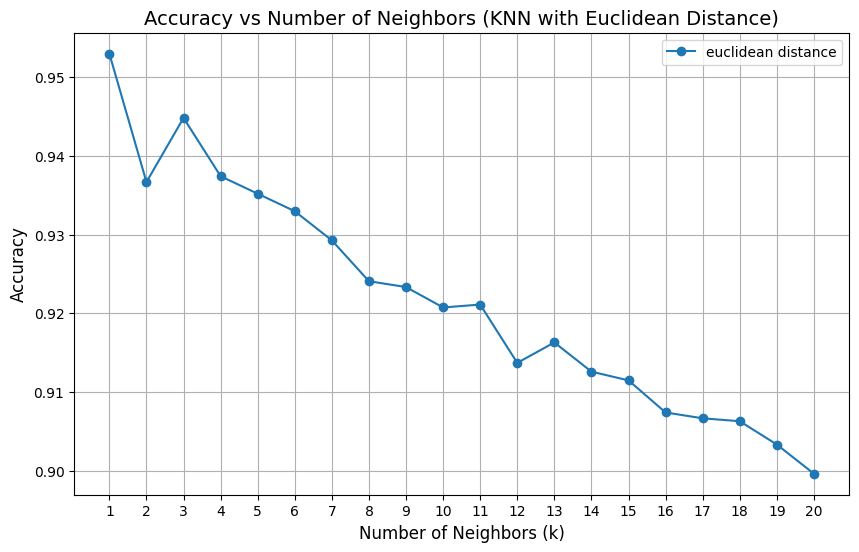

Best Accuracy with Euclidean Distance: 0.95 achieved with 1 neighbors.


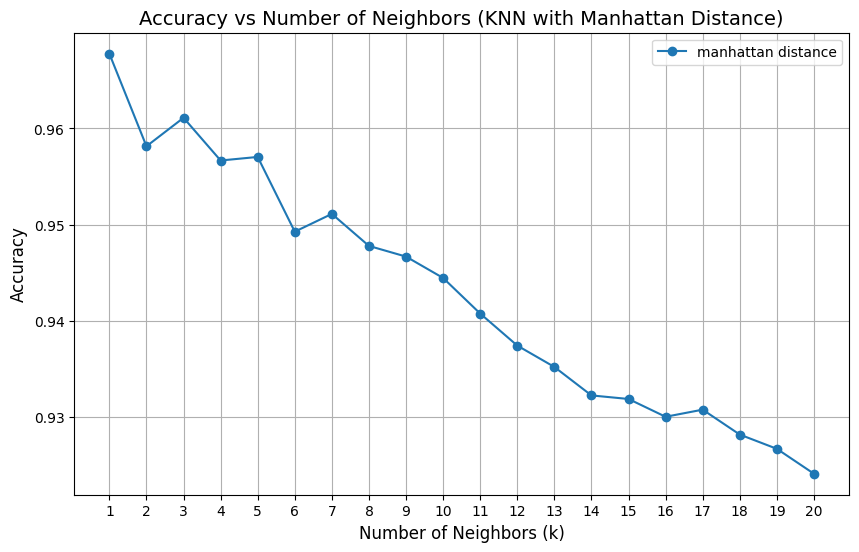

Best Accuracy with Manhattan Distance: 0.97 achieved with 1 neighbors.


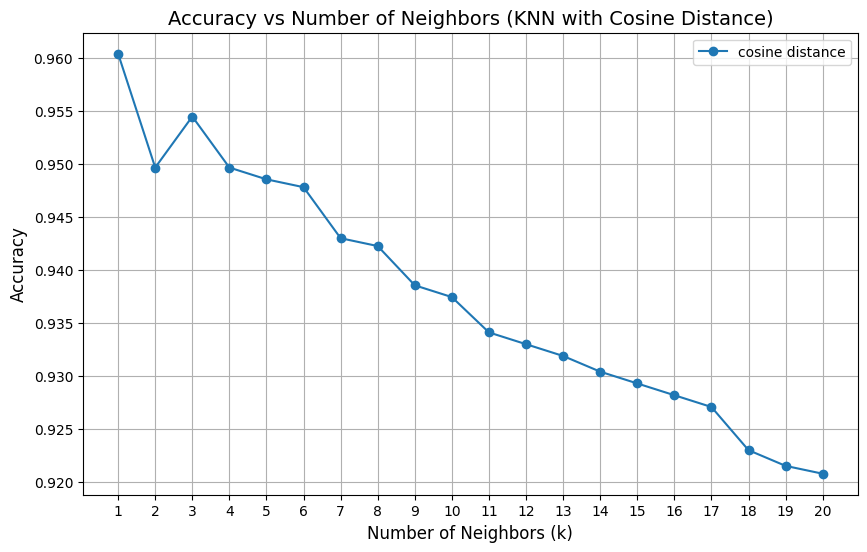

Best Accuracy with Cosine Distance: 0.96 achieved with 1 neighbors.


In [129]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Define distance metrics to evaluate
metrics = ['euclidean', 'manhattan', 'cosine']
results = {}

# Iterate over each metric
for metric in metrics:
    neighbors = range(1, 21)  # Number of neighbors from 1 to 20
    accuracies = []
    
    # Iterate over different numbers of neighbors
    for n in neighbors:
        classifier = KNeighborsClassifier(n_neighbors=n, metric=metric)  # Set metric
        classifier.fit(X_train, y_train)  # Train the classifier
        y_pred = classifier.predict(X_test)  # Predict on the test set
        accuracy = accuracy_score(y_test, y_pred)  # Compute accuracy
        accuracies.append(accuracy)  # Store accuracy
    
    # Store results for each metric
    results[metric] = accuracies
    
    # Plot accuracy vs number of neighbors for the current metric
    plt.figure(figsize=(10, 6))
    plt.plot(neighbors, accuracies, marker='o', linestyle='-', label=f'{metric} distance')
    plt.title(f"Accuracy vs Number of Neighbors (KNN with {metric.title()} Distance)", fontsize=14)
    plt.xlabel("Number of Neighbors (k)", fontsize=12)
    plt.ylabel("Accuracy", fontsize=12)
    plt.xticks(neighbors)
    plt.grid()
    plt.legend()
    plt.show()

    # Print the best accuracy and corresponding number of neighbors
    best_accuracy = max(accuracies)
    best_k = neighbors[np.argmax(accuracies)]
    print(f"Best Accuracy with {metric.title()} Distance: {best_accuracy:.2f} achieved with {best_k} neighbors.")

hence we will choose k as 3 because it may generalizes better than k=1 for unknown set, and we use cosine similarity because it is perfect for this task.

In [143]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from keras.utils import to_categorical

# Convert y_train and y_test to one-hot encoded vectors
y_train = to_categorical(y_train, num_classes)  # Adjust num_classes as per your data
y_test = to_categorical(y_test, num_classes)

# Define the CNN model
model = Sequential()

# First convolutional layer
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(40, 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))

# Second convolutional layer
model.add(Conv1D(64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))

# Third convolutional layer
model.add(Conv1D(128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))

# Fourth convolutional layer
model.add(Conv1D(256, kernel_size=3, activation='relu'))
model.add(BatchNormalization())

# Flatten layer
model.add(Flatten())

# Fully connected dense layer with dropout
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(9, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Define the callback to save the best model based on validation accuracy
checkpoint = ModelCheckpoint(
    '/kaggle/working/best_model.keras',         # Path to save the best model
    monitor='val_accuracy',  # Monitor validation accuracy
    save_best_only=True,     # Save only the best model
    mode='max',              # Save the model with max validation accuracy
    verbose=1                # Print messages when saving the model
)

# Fit the model with validation data and the checkpoint callback
history = model.fit(
    X_train, y_train, 
    epochs=50, 
    batch_size=32, 
    validation_data=(X_test, y_test), 
    callbacks=[checkpoint]   # Include the checkpoint callback
)


Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6461 - loss: 1.1399
Epoch 1: val_accuracy improved from -inf to 0.80481, saving model to /kaggle/working/best_model.keras
197/197 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.6467 - loss: 1.1379 - val_accuracy: 0.8048 - val_loss: 0.6378
Epoch 2/50
187/197 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8936 - loss: 0.3520
Epoch 2: val_accuracy improved from 0.80481 to 0.93000, saving model to /kaggle/working/best_model.keras
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8938 - loss: 0.3509 - val_accuracy: 0.9300 - val_loss: 0.2307
Epoch 3/50
186/197 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9255 - loss: 0.2328
Epoch 3: val_accuracy improved from 0.93000 to 0.93481, saving model to /kaggle/working/best_model.keras
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9255 - loss: 0.2331 - val_accuracy: 0.9348 - val_loss: 0.2154
Epoch 4/50
182/197 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9356 - loss: 0.1992
E

In [144]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('/kaggle/working/best_model.keras')

# Check the model summary to ensure it loaded correctly
model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_64 (Conv1D)              │ (None, 38, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_64          │ (None, 38, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_48 (MaxPooling1D) │ (None, 19, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_65 (Conv1D)              │ (None, 17, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_65          │ (None, 17, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_49 (MaxPooling1D) │ (None, 8, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_66 (Conv1D)              │ (None, 6, 128)         │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_66          │ (None, 6, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_50 (MaxPooling1D) │ (None, 3, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_67 (Conv1D)              │ (None, 1, 256)         │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_67          │ (None, 1, 256)         │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 494,813 (1.89 MB)

 Trainable params: 164,617 (643.04 KB)

 Non-trainable params: 960 (3.75 KB)

 Optimizer params: 329,236 (1.26 MB)

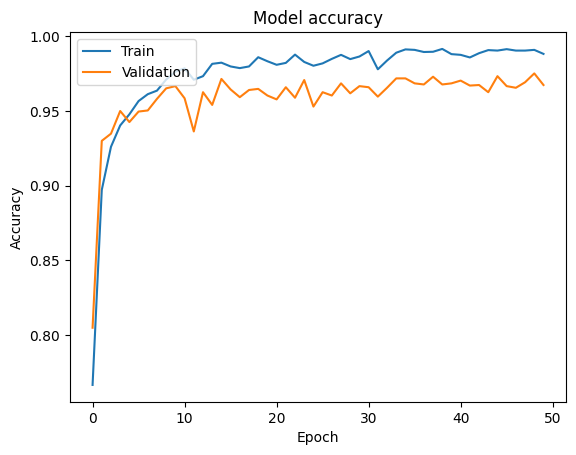

In [145]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [146]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

class_labels = lb.classes_

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)
confusion_mtx = confusion_matrix(y_test_labels, y_pred_classes)
confusion_df = pd.DataFrame(confusion_mtx, index=class_labels, columns=class_labels)


85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [147]:
print(confusion_mtx )

[[289   1   4   1   0   3   0   1   1]
 [  0 295   2   1   0   1   0   1   0]
 [  0   0 298   0   1   0   0   0   1]
 [  0   2   2 290   0   3   0   1   2]
 [  1   1   1   1 292   0   0   3   1]
 [  1   0   3   0   1 293   0   0   2]
 [  0   0   1   0   0   5 294   0   0]
 [  0   1   0   0   0   0   0 298   1]
 [  3   1   2   1   1   5   1   2 284]]


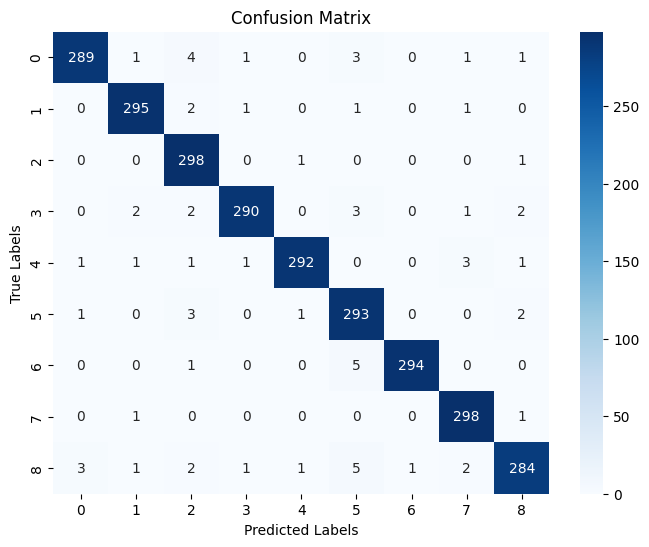

In [148]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(9), yticklabels=np.arange(9))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [151]:
y_test = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

In [155]:
# Print the results in a standard format
print("Model Evaluation Results")
print("==========================")
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Model Evaluation Results
Accuracy: 97.52%

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       300
           1       0.98      0.98      0.98       300
           2       0.95      0.99      0.97       300
           3       0.99      0.97      0.98       300
           4       0.99      0.97      0.98       300
           5       0.95      0.98      0.96       300
           6       1.00      0.98      0.99       300
           7       0.97      0.99      0.98       300
           8       0.97      0.95      0.96       300

    accuracy                           0.98      2700
   macro avg       0.98      0.98      0.98      2700
weighted avg       0.98      0.98      0.98      2700



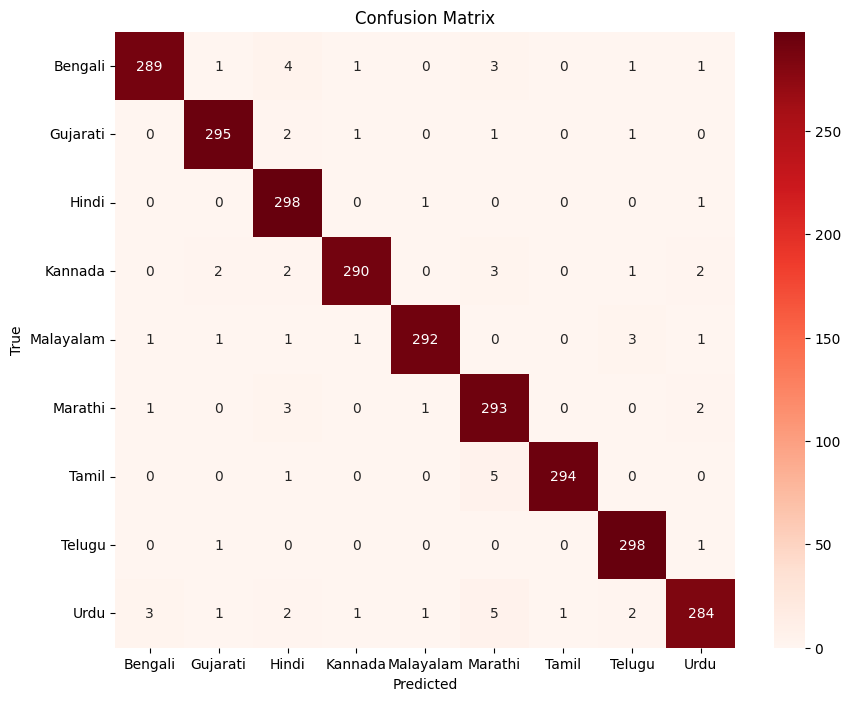

In [156]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_df, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

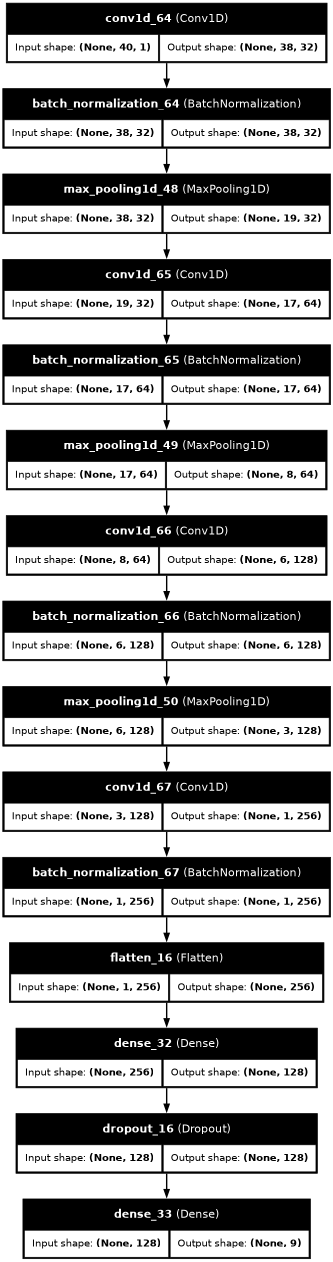

In [157]:
from tensorflow.keras.utils import plot_model

# Assuming `model` is your Keras model
plot_model(model, to_file='cnn_model_architecture.png', show_shapes=True, show_layer_names=True,dpi=50)


In [15]:
print('hi')

hi


In [169]:
X_train=np.array(train_data['Features'].tolist())
y_train=np.array(train_data['label'].tolist());
X_test=np.array(test_data['Features'].tolist())
y_test=np.array(test_data['label'].tolist())
from sklearn.preprocessing import LabelEncoder

lb=LabelEncoder()

y_train=lb.fit_transform(y_train)
y_test=lb.fit_transform(y_test)

In [170]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from keras.utils import to_categorical

# Convert y_train and y_test to one-hot encoded vectors (if they are not already)
y_train = to_categorical(y_train, num_classes=10)  # Adjust num_classes as per your data
y_test = to_categorical(y_test, num_classes=10)

# Define the encoder-decoder model
model = Sequential()

# **Encoder**
# First convolutional layer (encoding part)
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(40, 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))

# Second convolutional layer
model.add(Conv1D(64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))

# Third convolutional layer
model.add(Conv1D(128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))

# Fourth convolutional layer (if needed, adjust number of filters and kernel size)
model.add(Conv1D(256, kernel_size=3, activation='relu'))
model.add(BatchNormalization())

# **Decoder (just a simple fully connected layer after encoding)**
# Flatten the output from the encoder (the last Conv1D layer)
model.add(Flatten())

# Dense layer to decode the features into the final output
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization

# Output layer for classification (softmax for multi-class classification)
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Save the best model based on validation accuracy
# We will use ModelCheckpoint to save the best model during training
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('/kaggle/working/best_encoder_decoder_model.keras', 
                             monitor='val_accuracy', 
                             save_best_only=True, 
                             mode='max', 
                             verbose=1)

# Train the model again with the checkpoint to save the best model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[checkpoint])

print("Best model saved successfully!")


Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6490 - loss: 1.1638
Epoch 1: val_accuracy improved from -inf to 0.82259, saving model to /kaggle/working/best_encoder_decoder_model.keras
197/197 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.6496 - loss: 1.1618 - val_accuracy: 0.8226 - val_loss: 0.6970
Epoch 2/50
186/197 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8796 - loss: 0.3965
Epoch 2: val_accuracy improved from 0.82259 to 0.90074, saving model to /kaggle/working/best_encoder_decoder_model.keras
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8803 - loss: 0.3941 - val_accuracy: 0.9007 - val_loss: 0.3462
Epoch 3/50
190/197 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9287 - loss: 0.2339
Epoch 3: val_accuracy improved from 0.90074 to 0.93222, saving model to /kaggle/working/best_encoder_decoder_model.keras
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9283 - loss: 0.2354 - val_accuracy: 0.9322 - val_loss: 0.2235
Epoch 4/50
194/197 ━━━━━━━━━━━━━━━━━━━━

In [172]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('/kaggle/working/best_encoder_decoder_model.keras')

# Check the model summary to ensure it loaded correctly
model.summary()

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_92 (Conv1D)              │ (None, 38, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_92          │ (None, 38, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_69 (MaxPooling1D) │ (None, 19, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_93 (Conv1D)              │ (None, 17, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_93          │ (None, 17, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_70 (MaxPooling1D) │ (None, 8, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_94 (Conv1D)              │ (None, 6, 128)         │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_94          │ (None, 6, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_71 (MaxPooling1D) │ (None, 3, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_95 (Conv1D)              │ (None, 1, 256)         │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_95          │ (None, 1, 256)         │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_23 (Flatten)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 495,200 (1.89 MB)

 Trainable params: 164,746 (643.54 KB)

 Non-trainable params: 960 (3.75 KB)

 Optimizer params: 329,494 (1.26 MB)

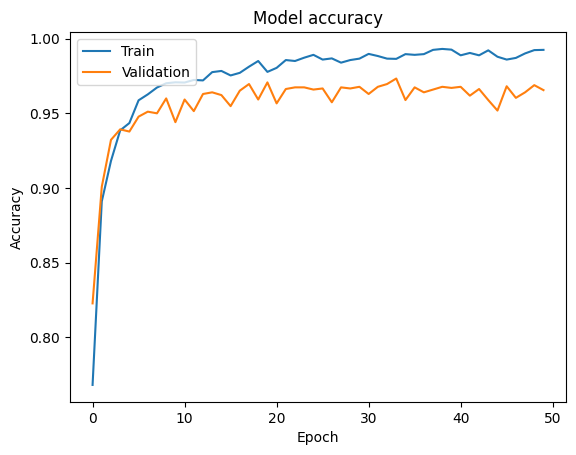

In [173]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [174]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

class_labels = lb.classes_

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)
confusion_mtx = confusion_matrix(y_test_labels, y_pred_classes)
confusion_df = pd.DataFrame(confusion_mtx, index=class_labels, columns=class_labels)
print(confusion_mtx )

85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
[[283   1   6   0   1   0   0   2   7]
 [  0 294   1   1   1   0   0   1   2]
 [  2   0 296   0   1   0   0   0   1]
 [  0   3   3 290   1   1   0   1   1]
 [  5   0   0   1 293   0   0   1   0]
 [  0   3   2   0   1 290   1   0   3]
 [  0   0   1   0   3   0 296   0   0]
 [  0   1   0   0   0   0   0 299   0]
 [  5   0   2   1   0   2   1   2 287]]


In [175]:
y_test = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

In [176]:
# Print the results in a standard format
print("Model Evaluation Results")
print("==========================")
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Model Evaluation Results
Accuracy: 97.33%

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       300
           1       0.97      0.98      0.98       300
           2       0.95      0.99      0.97       300
           3       0.99      0.97      0.98       300
           4       0.97      0.98      0.98       300
           5       0.99      0.97      0.98       300
           6       0.99      0.99      0.99       300
           7       0.98      1.00      0.99       300
           8       0.95      0.96      0.96       300

    accuracy                           0.97      2700
   macro avg       0.97      0.97      0.97      2700
weighted avg       0.97      0.97      0.97      2700



Encoder Decoder with skip-connections

In [203]:
X_train=np.array(train_data['Features'].tolist())
y_train=np.array(train_data['label'].tolist());
X_test=np.array(test_data['Features'].tolist())
y_test=np.array(test_data['label'].tolist())
from sklearn.preprocessing import LabelEncoder

lb=LabelEncoder()

y_train=lb.fit_transform(y_train)
y_test=lb.fit_transform(y_test)

In [193]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization, UpSampling1D, Add, Concatenate
from tensorflow.keras.optimizers import Adam
from keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

# Convert y_train and y_test to one-hot encoded vectors (if they are not already)
y_train = to_categorical(y_train, num_classes=9)  # Adjust num_classes to 9
y_test = to_categorical(y_test, num_classes=9)

# Define the encoder-decoder model with skip connections (U-Net inspired)
input_layer = Input(shape=(40, 1))  # Assuming input shape is (40, 1)

# **Encoder**
# First convolutional layer (encoding part)
x = Conv1D(32, kernel_size=3, activation='relu', padding='same')(input_layer)
x = BatchNormalization()(x)
x = MaxPooling1D(pool_size=2)(x)  # Reduces sequence length by a factor of 2
print(f"Shape after encoder layer 1: {x.shape}")  # Print shape

# Second convolutional layer
x1 = Conv1D(64, kernel_size=3, activation='relu', padding='same')(x)
x1 = BatchNormalization()(x1)
x1 = MaxPooling1D(pool_size=2)(x1)  # Reduces sequence length by a factor of 2
print(f"Shape after encoder layer 2: {x1.shape}")  # Print shape

# Third convolutional layer
x2 = Conv1D(128, kernel_size=3, activation='relu', padding='same')(x1)
x2 = BatchNormalization()(x2)
x2 = MaxPooling1D(pool_size=2)(x2)  # Reduces sequence length by a factor of 2
print(f"Shape after encoder layer 3: {x2.shape}")  # Print shape

# Fourth convolutional layer
x3 = Conv1D(256, kernel_size=3, activation='relu', padding='same')(x2)
x3 = BatchNormalization()(x3)
print(f"Shape after encoder layer 4: {x3.shape}")  # Print shape

# **Decoder (with skip connections)**
# First upsampling
# First upsampling (Keep sequence length consistent with earlier layers)
x4 = UpSampling1D(size=1)(x3)  # No change in sequence length
x4 = Conv1D(128, kernel_size=3, activation='relu', padding='same')(x4)
print(f"Shape after upsampling layer 1: {x4.shape}")  # Check if shape is now (None, 5, 128)

# Apply a Conv1D layer to reduce the number of channels to 128
x4 = Conv1D(128, kernel_size=3, activation='relu', padding='same')(x4)
print(f"Shape after reducing channels: {x4.shape}")  # Shape should be (None, 5, 128)

# Second upsampling
x5 = UpSampling1D(size=2)(x4)  # No change in sequence length
x5 = Conv1D(64, kernel_size=3, activation='relu', padding='same')(x5)
print(f"Shape after upsampling layer 2: {x5.shape}")  # Check if shape is now (None, 5, 64)

# Concatenating skip connection from encoder layer 2
x5 = Concatenate()([x5, x1])
print(f"Shape after concatenation 2: {x5.shape}")  # Shape should remain (None, 5, 128)

# Apply a Conv1D layer to reduce the number of channels to 64
x5 = Conv1D(64, kernel_size=3, activation='relu', padding='same')(x5)
print(f"Shape after reducing channels 2: {x5.shape}")  # Shape should be (None, 5, 64)

# Third upsampling
x6 = UpSampling1D(size=2)(x5)  # No change in sequence length
x6 = Conv1D(32, kernel_size=3, activation='relu', padding='same')(x6)
print(f"Shape after upsampling layer 3: {x6.shape}")  # Check if shape is now (None, 5, 32)

# Concatenating skip connection from encoder layer 1
x6 = Concatenate()([x6, x])
print(f"Shape after concatenation 3: {x6.shape}")  # Shape should remain (None, 5, 64)

# Apply a Conv1D layer to reduce the number of channels to 32
x6 = Conv1D(32, kernel_size=3, activation='relu', padding='same')(x6)
print(f"Shape after reducing channels 3: {x6.shape}")  # Shape should be (None, 5, 32)


# **Final Classification**
# Flatten the output for dense layers
x7 = Flatten()(x6)
print(f"Shape before dense layer: {x7.shape}")  # Print shape

x7 = Dense(128, activation='relu')(x7)
x7 = Dropout(0.5)(x7)  # Dropout for regularization

# Output layer for classification (softmax for multi-class classification)
output_layer = Dense(9, activation='softmax')(x7)  # 9 classes for output

# Define the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Save the best model based on validation accuracy
checkpoint = ModelCheckpoint('/kaggle/working/best_encoder_decoder_skip_connections_unet_model.keras', 
                             monitor='val_accuracy', 
                             save_best_only=True, 
                             mode='max', 
                             verbose=1)

# Train the model with the checkpoint to save the best model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[checkpoint])

print("Best model with U-Net style skip connections saved successfully!")

Shape after encoder layer 1: (None, 20, 32)
Shape after encoder layer 2: (None, 10, 64)
Shape after encoder layer 3: (None, 5, 128)
Shape after encoder layer 4: (None, 5, 256)
Shape after upsampling layer 1: (None, 5, 128)
Shape after reducing channels: (None, 5, 128)
Shape after upsampling layer 2: (None, 10, 64)
Shape after concatenation 2: (None, 10, 128)
Shape after reducing channels 2: (None, 10, 64)
Shape after upsampling layer 3: (None, 20, 32)
Shape after concatenation 3: (None, 20, 64)
Shape after reducing channels 3: (None, 20, 32)
Shape before dense layer: (None, 640)
Epoch 1/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5684 - loss: 1.2835
Epoch 1: val_accuracy improved from -inf to 0.76963, saving model to /kaggle/working/best_encoder_decoder_skip_connections_unet_model.keras
197/197 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - accuracy: 0.5691 - loss: 1.2815 - val_accuracy: 0.7696 - val_loss: 0.7659
Epoch 2/50
189/197 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.87

In [200]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('/kaggle/working/best_encoder_decoder_skip_connections_unet_model.keras')

# Check the model summary to ensure it loaded correctly
model.summary()

Model: "functional_453"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_36      │ (None, 40, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_164 (Conv1D) │ (None, 40, 32)    │        128 │ input_layer_36[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 40, 32)    │        128 │ conv1d_164[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_108   │ (None, 20, 32)    │          0 │ batch_normalizat… │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_165 (Conv1D) │ (None, 20, 64)    │      6,208 │ max_pooling1d_10… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 20, 64)    │        256 │ conv1d_165[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_109   │ (None, 10, 64)    │          0 │ batch_normalizat… │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_166 (Conv1D) │ (None, 10, 128)   │     24,704 │ max_pooling1d_10… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 10, 128)   │        512 │ conv1d_166[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_110   │ (None, 5, 128)    │          0 │ batch_normalizat… │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_167 (Conv1D) │ (None, 5, 256)    │     98,560 │ max_pooling1d_11… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 5, 256)    │      1,024 │ conv1d_167[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling1d_16    │ (None, 5, 256)    │          0 │ batch_normalizat… │
│ (UpSampling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_168 (Conv1D) │ (None, 5, 128)    │     98,432 │ up_sampling1d_16… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_169 (Conv1D) │ (None, 5, 128)    │     49,280 │ conv1d_168[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling1d_17    │ (None, 10, 128)   │          0 │ conv1d_169[0][0]  │
│ (UpSampling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_170 (Conv1D) │ (None, 10, 64)    │     24,640 │ up_sampling1d_17… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_8       │ (None, 10, 128)   │          0 │ conv1d_170[0][0], │
│ (Concatenate)       │                   │            │ max_pooling1d_10… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_171 (Conv1D) │ (None, 10, 64)    │     24,640 │ concatenate_8[0]… │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 1,270,301 (4.85 MB)

 Trainable params: 423,113 (1.61 MB)

 Non-trainable params: 960 (3.75 KB)

 Optimizer params: 846,228 (3.23 MB)

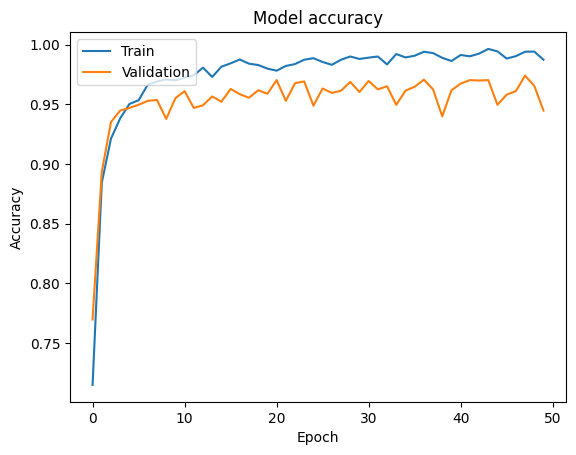

In [201]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [205]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

class_labels = lb.classes_

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)
confusion_mtx = confusion_matrix(y_test_labels, y_pred_classes)
confusion_df = pd.DataFrame(confusion_mtx, index=class_labels, columns=class_labels)
print(confusion_mtx )

85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[292   1   2   0   0   1   0   1   3]
 [  0 296   0   2   1   0   0   1   0]
 [  1   0 296   0   1   1   0   0   1]
 [  0   2   2 292   0   3   0   0   1]
 [  1   0   0   3 293   0   0   1   2]
 [  1   1   2   1   1 287   1   0   6]
 [  2   0   1   0   0   1 295   0   1]
 [  0   1   0   0   0   0   1 297   1]
 [  4   2   2   2   5   3   0   0 282]]


In [206]:
y_test = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

In [207]:
# Print the results in a standard format
print("Model Evaluation Results")
print("==========================")
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Model Evaluation Results
Accuracy: 97.41%

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       300
           1       0.98      0.99      0.98       300
           2       0.97      0.99      0.98       300
           3       0.97      0.97      0.97       300
           4       0.97      0.98      0.98       300
           5       0.97      0.96      0.96       300
           6       0.99      0.98      0.99       300
           7       0.99      0.99      0.99       300
           8       0.95      0.94      0.94       300

    accuracy                           0.97      2700
   macro avg       0.97      0.97      0.97      2700
weighted avg       0.97      0.97      0.97      2700

